#### AUTHOR: ANDOLE LAVANYA

##### Simple Linear regression:

In a simple linear regression, there is one independent variable and one dependent variable. The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.  

To calculate best-fit line linear regression uses a traditional slope-intercept form which is given below,

   **Yi = β0 + β1Xi**

where Yi = Dependent variable,  β0 = constant/Intercept, β1 = Slope/Intercept, Xi = Independent variable.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Reading a File

In [2]:
df=pd.read_csv(r"C:\Users\sai87\Downloads\Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
###droping unnamed:0 column
df1=df.drop(columns="Unnamed: 0")

#### Exploratory Data Aalysis

In [4]:
##to see the first 5 rows from the dataframe
df1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
##to see random 5 rows from dataframe
df1.sample(4)

,YearsExperience,Salary
15,5.0,67939.0
8,3.3,64446.0
0,1.2,39344.0
20,6.9,91739.0


In [6]:
##to see the first 5 rows from the dataframe

df1.tail()

,YearsExperience,Salary
25,9.1,105583.0
26,9.6,116970.0
27,9.7,112636.0
28,10.4,122392.0
29,10.6,121873.0


In [7]:
##it gives the dimension of rows and columns
df1.shape

(30, 2)

In [8]:
##returns the description of the data in the dataframe
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
##prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [10]:
##it gives the count of null values
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 1.0, 'yearsexperience Vs Salary')

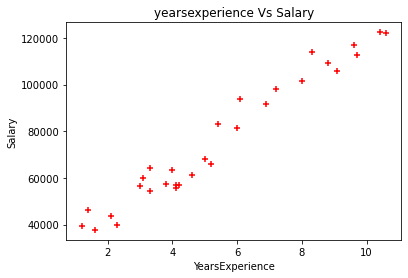

In [11]:
##relation b/w years of experience and salary
plt.scatter(x=df1.YearsExperience,y=df1.Salary,color='red',marker='+')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('yearsexperience Vs Salary')

#### Simple Linear Regression Using OLS Method

In [12]:
X=df1[["YearsExperience"]] ###independent var
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [13]:
Y=df1[["Salary"]]   ##dependent var
Y.head()

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [14]:
XC=sm.add_constant(X)  ###constant

In [15]:
##model fitting
model=sm.OLS(Y,XC).fit()

In [16]:
##it gives the intercept and the slope of the fitted regression line 
model.params

const              24848.203967
YearsExperience     9449.962321
dtype: float64

In [17]:
##gives the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        17:54:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1)From the above result,R-square is **0.957(95.7%)** i.e the variance in Salary is explained by YearsExperience hence it is a best fit of a Model.  
2)Here **p=0.00<0.05** it is statistically significant.we can say that it is strongly correlated.

#### Splitting the Data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
X_train.shape,X_test.shape

((24, 1), (6, 1))

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
###printing the intercept and coeff of the model
print("Intercept is:",str(model.intercept_))
print("the coeff value is :",str(model.coef_))

Intercept is: [25809.39055246]
the coeff value is : [[9345.91354219]]


In [22]:
model.coef_

array([[9345.91354219]])

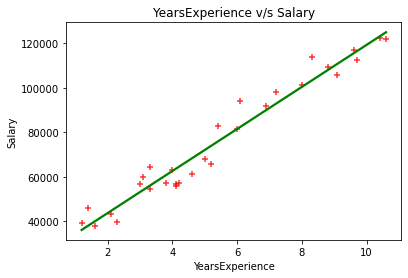

In [23]:
###plotting the Linear Regression Line
warnings.filterwarnings("ignore")
sb.regplot(X,Y,color="red",marker="+",ci=None,line_kws=dict(color="g"))
plt.title("YearsExperience v/s Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

<AxesSubplot:>

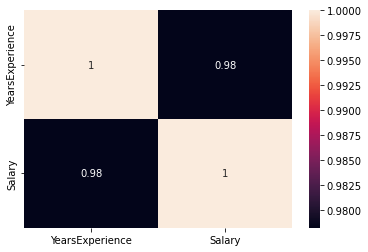

In [24]:
sb.heatmap(df1.corr(),annot=True)

In [25]:
#### predicting the model
y_pred=pd.DataFrame(model.predict(X_test),columns=["Predicted"])
y_pred

,Predicted
0,40762.852220
1,108053.429724
2,38893.669512
3,47304.991700
4,56650.905242
5,65062.227430


In [26]:
Y_test.reset_index(drop=True,inplace=True)
performance=pd.concat([y_pred,Y_test],axis=1)
performance['error']=performance.Predicted-performance.Salary
performance.rename(columns={"Predicted":"PredictedValues","Salary":"ActualValues"})

,PredictedValues,ActualValues,error
0,40762.852220,37732.0,3030.852220
1,108053.429724,109432.0,-1378.570276
2,38893.669512,46206.0,-7312.330488
3,47304.991700,39892.0,7412.991700
4,56650.905242,54446.0,2204.905242
5,65062.227430,57082.0,7980.227430


In [27]:
##evaluting the model performamce
from sklearn import metrics
MSE=metrics.mean_squared_error(Y_test,y_pred)
print("mean Square error(MSE) is:",MSE)
R_square=model.score(X_train,Y_train)
print("The R-Square value is:",R_square)

mean Square error(MSE) is: 31342463.54159009
The R-Square value is: 0.9517070490383873


#### Predicting salary of employee who is having 8 yearsExperience

In [28]:
experience=8
predicted_salary=model.predict([[experience]])
print("the predicted salary of an employee who is having 8 yrs of experience is:",predicted_salary[0][0].round(1))

the predicted salary of an employee who is having 8 yrs of experience is: 100576.7


#### Predicting salary of employee who is having 12 yearsExperience

In [29]:
experience=12
predicted_salary=model.predict([[experience]])
print("the predicted salary of an employee who is having 8 yrs of experience is:",predicted_salary[0][0].round(1))

the predicted salary of an employee who is having 8 yrs of experience is: 137960.4


#### THANK YOU!